In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "data_train.csv"
ratings = load_data(path_dataset)
sp.find(ratings)
print(ratings.shape)

number of items: 10000, number of users: 1000
(10000, 1000)


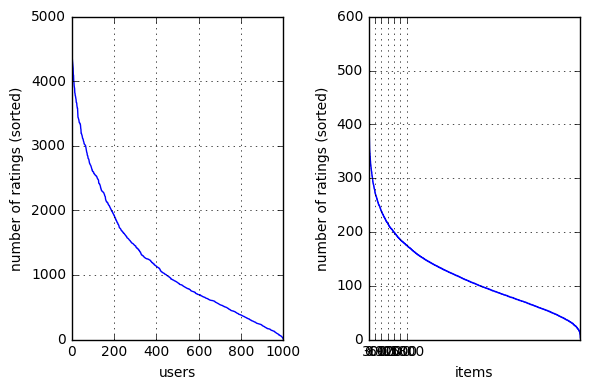

min # of items per user = 8, min # of users per item = 3.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

# Ratings distribution

In [56]:
nnz = sp.find(ratings)
items = nnz[0]
users = nnz[1]
rates = nnz[2]
print(np.unique(users).shape)
print(np.unique(items).shape)
print(rates.shape)
for i in range(5):
    print(rates[rates==i+1].shape)
    
print(users)
print(items)
print(rates)

(1000,)
(10000,)
(1176952,)
(43508,)
(99180,)
(274327,)
(324700,)
(435237,)
[  0   0   0 ..., 999 999 999]
[  43   60   66 ..., 9993 9996 9999]
[ 4.  3.  4. ...,  3.  4.  3.]


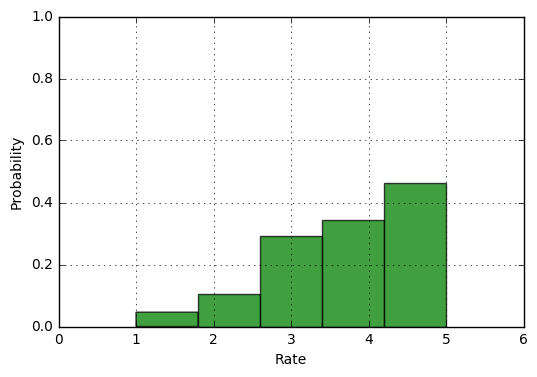

In [26]:
# the histogram of the data
n, bins, patches = plt.hist(rates, 5, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([0, 6, 0, 1])
plt.grid(True)

plt.show()

# Analysis per user

In [35]:
ratePerUser = np.zeros(len(np.unique(users))) # mean rate per user (over all movies)
for i,user in enumerate(np.unique(users)):
    ratePerUser[i] = np.mean(rates[users == user])

ratePerMovie = np.zeros(len(np.unique(items))) # mean rate of each movie (over all users)
for i,item in enumerate(np.unique(items)):
    ratePerMovie[i] = np.mean(rates[items == item])
    


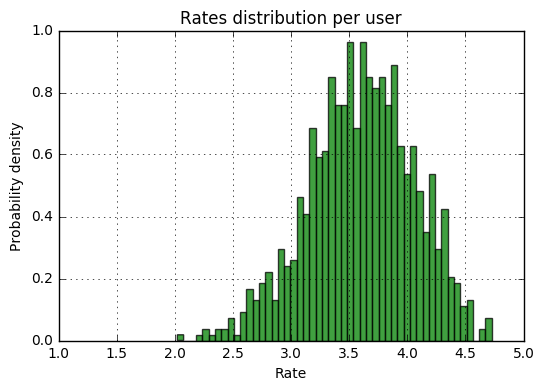

In [54]:
# the histogram of the data
n, bins, patches = plt.hist(ratePerUser, 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability density')
plt.title('Rates distribution per user')
plt.axis([1, 5, 0, 1])
plt.grid(True)

plt.show()

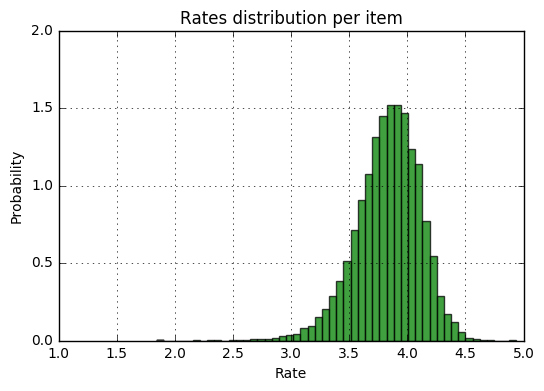

In [55]:
# the histogram of the data
n, bins, patches = plt.hist(ratePerMovie, 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability density')
plt.title('Rates distribution per item')
plt.axis([1, 5, 0,2])
plt.grid(True)

plt.show()